# Signal and System Experiment

## Symbols

- $\theta$ - Heaviside function

In [1]:
import numpy as np
# import scipy.integrate as integrate
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt 
%matplotlib inline

## Experiment Jobs

### Lab 1 - CTS TD Analysis

#### Lab 1.1 - Convolution

**Lab 1.1.1**

$$
\begin{align}
x(t) &= e^{-t} \Big[ u(t) - u(t-2) \Big] \\
h(t) &= 2 \Big[ u(t) - u(t-2) \Big]
\end{align}
$$

In [2]:
xt = np.arange(0.0, 2.0, 1e-2)
ht = np.arange(0.0, 2.0, 1e-2)

x = np.exp(-xt)
h = np.ones(len(ht))

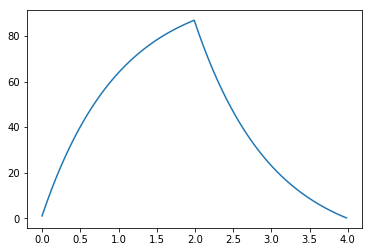

In [3]:
e = np.convolve(x, h)

et = np.arange(0.0, len(e) / 1e2 - 0.0, 1e-2)

plt.plot(et, e)
plt.show()

**Lab 1.1.2**

$$
\begin{align}
x(t) &= \Big( 1 - \frac{\vert t \vert}{4} \Big) \Big[ u(t+4) - u(t-4) \Big] \\
h(t) &= u(t+4) - u(t-4)
\end{align}
$$

In [4]:
xt = np.arange(-4.0, 4.0, 1e-2)
ht = np.arange(-4.0, 4.0, 1e-2)

x = (1 - np.abs(xt) / 4)
h = np.ones(len(ht))

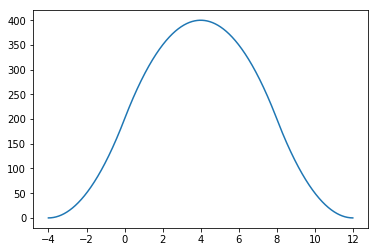

In [5]:
e = np.convolve(x, h)

et = np.arange(-4.0, len(e) / 1e2 - 4.0, 1e-2)

plt.plot(et, e)
plt.show()

#### Lab 1.2 - Differential Equation

**Lab 1.2.1**

First order RC circuit, given
$$
\begin{align}
e(t) &= \epsilon (t-2) \\
R &= 10 \, \Omega \\
C &= 4 \, F \\
u(0_{-}) &= 2 \, V
\end{align}
$$

In [51]:
# t = sp.symbols('t')
# r = sp.Function('r')

# eq = sp.Eq(3*sp.Derivative(r(t), t) + 2*r(t))
# sol = sp.dsolve(eq, r(t)).rhs
# constants = sp.solve([sol.subs(t, 0) - 2], dict=True)
# sol.subs(constants[0])

**Lab 1.2.2**  

First order differential equation, given
$$
\begin{align}
\frac{dy(t)}{dt} + 0.5 y(t) &= x(t)
\end{align}
$$

let
$$
\begin{align}
x(t) &= \delta(t) \\
y(0) &= 0
\end{align}
$$

In [66]:
t = sp.symbols('t')
x = sp.functions.DiracDelta
y = sp.Function('y')

eq = sp.Eq(sp.Derivative(y(t),t) + 0.5*y(t), x(t))
sol = sp.dsolve(eq)
sol

In [116]:
constants = sp.solve([sol.subs(t, 0) - 0], dict=True)
# sol.subs(constants[0])
C1 = constants[0][sp.Symbol('C1')].subs(y(0), 0)
sol.subs(sp.Symbol('C1'), C1)

TypeError: unsupported operand type(s) for /: 'stringPict' and 'prettyForm'

**Lab 1.2.3**  

Second order differential equation, given
$$
\begin{align}
4 \frac{d^2 y(t)}{d t^2} + y(t) &= \frac{d x(t)}{dt} - 0.5 x(t) \\
\end{align}
$$

let
$$
\begin{align}
x(t) &= \delta(t) \\
y(0) &= 0 \\
y'(0) &= 0
\end{align}
$$

In [71]:
t = sp.symbols('t')
x = sp.functions.DiracDelta
y = sp.Function('y')

eq = sp.Eq(4*sp.Derivative(y(t), t, t) + y(t), sp.Derivative(x(t), t) - 0.5*x(t))
sol = sp.dsolve(eq)
# print(sol)
sol

TypeError: unsupported operand type(s) for /: 'stringPict' and 'prettyForm'

In [72]:
constants = sp.solve([sol.subs(t, 0) - 0], dict=True)
sol.subs(constants[0])

TypeError: unsupported operand type(s) for /: 'stringPict' and 'prettyForm'

### Lab 2 - Fourier Analysis

#### Lab 2.1 - Frequency Spectrum Analysis on Periodic Signal

**Lab 2.1.1**

Rectangular at $\frac{\tau}{T} = \frac{1}{10}, \frac{1}{20}$

In [82]:
T, N = 10, 20
t, tau = sp.symbols('t tau')
rect = sp.functions.Heaviside(t + T / tau) - sp.functions.Heaviside(t - T / tau)
rect